In [8]:
#import python libraries
import torch
import numpy as np
import torchaudio

#Visualization libraries
from matplotlib import pyplot as plt
from matplotlib import cm
from matplotlib import colors
import seaborn as sns

#Write Libraries
from pathlib import Path
import pandas as pd

# Initialize Data

In [6]:
#Configure open/save path
open_folder = "2023 04 11 Two Waves"
path_open = "{}\\{}\\".format(str(Path.cwd()), open_folder)

In [10]:
df1 = pd.read_csv(path_open + 'signals.csv')
df1

,loc1,loc2,loc3,loc4,loc5
0,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...
2397,0.001732,-0.265701,0.145992,0.010110,-0.023919
2398,0.010927,-0.257022,0.160691,0.010286,-0.025044
2399,0.020625,-0.246724,0.174435,0.010423,-0.026035
2400,0.030802,-0.234939,0.187149,0.010521,-0.026881


<AxesSubplot:>

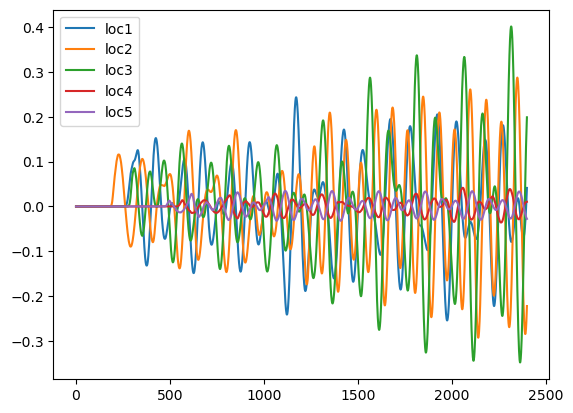

In [11]:
df1.plot()

# Plot Spectrograms

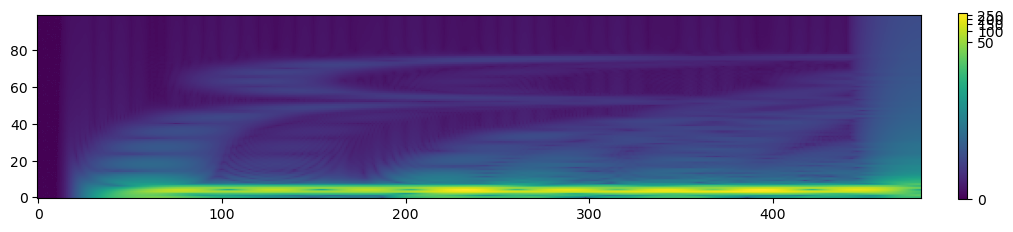

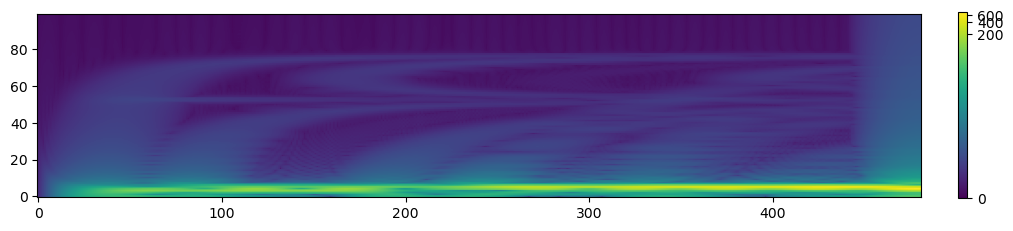

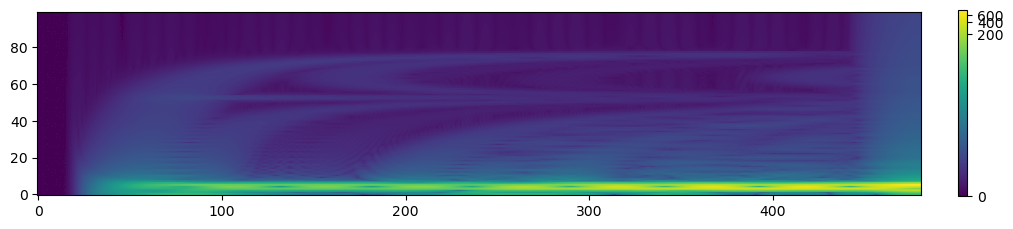

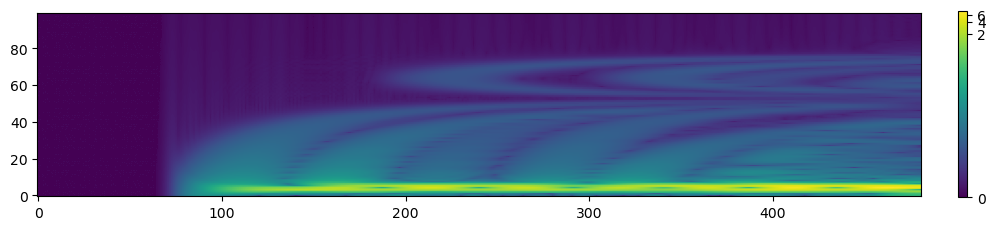

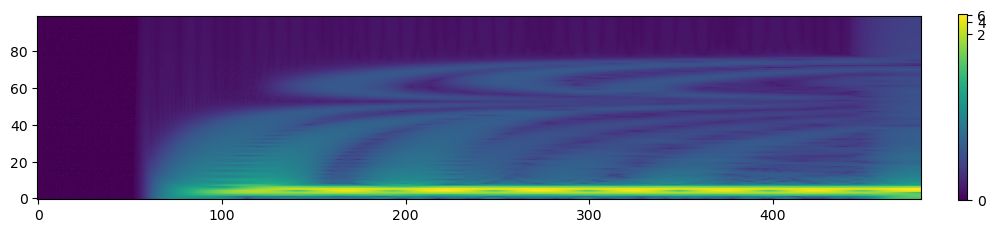

In [17]:
#Initialize Spectrogram
transform = torchaudio.transforms.Spectrogram(n_fft=400, hop_length=5)

for column in df1.columns:
    #Spectrogram
    spectrogram1 = transform(torch.tensor(df1[column].values))
    plt.figure(figsize=(12,10))
    #Plot only the lower frequencies of the spectrogram
    im = plt.imshow(spectrogram1[0:100].type(torch.double).cpu(), origin="lower", norm=colors.PowerNorm(gamma=0.1))
    plt.colorbar(im, fraction=0.01, pad=0.04)